In [1]:
!pip install pandas mlxtend matplotlib seaborn networkx

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 2.1 MB/s eta 0:00:01
   ------------------------------- -------- 1.0/1.4 MB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 2.2 MB/s  0:00:00
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.5/2.0 MB 3.6 MB/s eta 0:00:01
   ------------------------------ --------- 1.6/2.0 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 3.8 MB/s  0:00:00

   ---------------------------------------- 0/2 [networkx]
   ---------------------------------------- 0/2 [networkx]
   ---------------------------------------- 0/2 [networkx]
   ---------------------------------------- 0/2 [networkx]
   -------------------------

In [2]:
data=pd.read_csv("Groceries_dataset.csv")
print(data.head())

   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk


In [3]:
transactions = data.groupby('Member_number')[
    'itemDescription'].apply(list).values.tolist()

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [4]:
frequent_itemsets=apriori(df,min_support=0.01,use_colnames=True)
print(frequent_itemsets.head())

    support                 itemsets
0  0.015393  (Instant food products)
1  0.078502               (UHT-milk)
2  0.031042          (baking powder)
3  0.119548                   (beef)
4  0.079785                (berries)


In [5]:
rules=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.3)
print(rules.head())

       antecedents         consequents  antecedent support  \
0       (UHT-milk)  (other vegetables)            0.078502   
1       (UHT-milk)        (rolls/buns)            0.078502   
2       (UHT-milk)              (soda)            0.078502   
3       (UHT-milk)        (whole milk)            0.078502   
4  (baking powder)  (other vegetables)            0.031042   

   consequent support   support  confidence      lift  representativity  \
0            0.376603  0.038994    0.496732  1.318979               1.0   
1            0.349666  0.031042    0.395425  1.130863               1.0   
2            0.313494  0.027450    0.349673  1.115406               1.0   
3            0.458184  0.040534    0.516340  1.126928               1.0   
4            0.376603  0.015136    0.487603  1.294740               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
0  0.009430    1.238697       0.262440  0.093711   0.192700    0.300137  
1  0.003592    1.075687     

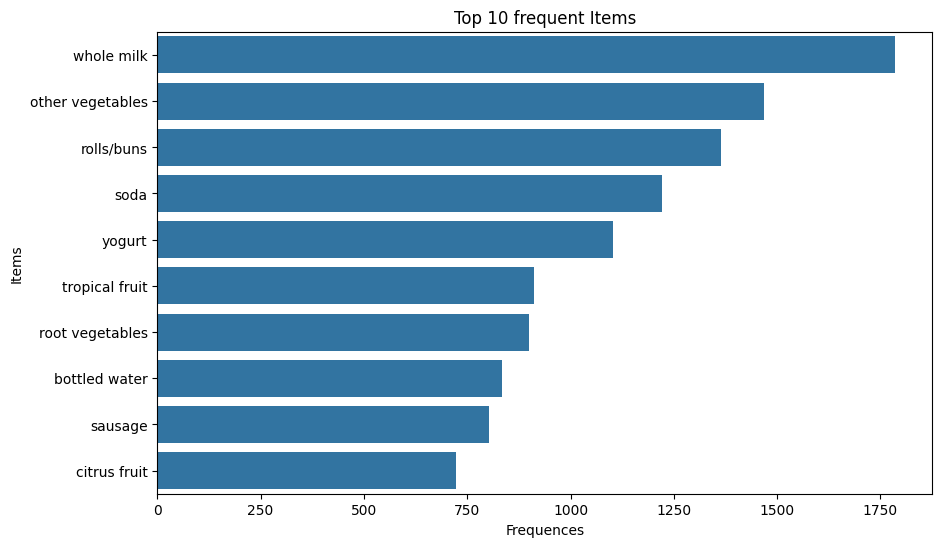

In [6]:
item_frequences=df.sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=item_frequences.head(10).values,y=item_frequences.head(10).index)
plt.title('Top 10 frequent Items')
plt.xlabel("Frequences")
plt.ylabel('Items')
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
scatter=plt.scatter(rules['support'],rules['confidence'],c=rules['lift'],cmap='virdis',alpha=0.7)
plt.colorbar(scatter,label='Lift')